# Assignment V: Adaboost

## Problem statement

We will use datasets generated from ```sklearn.dataset.make_classification``` and ```sklearn.dataset.make_mooons```. Let's first viaualize the $\texttt{classification}$ and $\texttt{moon}$ datasets with the ```scatter``` function from ```matplotlib.pyplot```.

**Classification dataset**

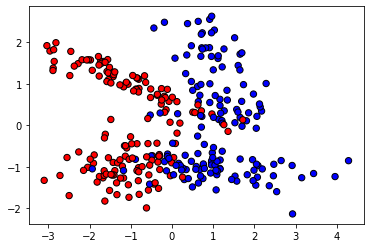

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.datasets import make_classification


cm_bright = ListedColormap(['#FF0000', '#0000FF'])
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm_bright, edgecolors='k')
plt.show()

**Moon dataset**

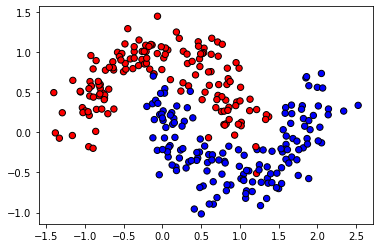

In [4]:
X,y = make_moons(n_samples=300, noise=0.2, random_state=0)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm_bright, edgecolors='k')
plt.show()

We will implement the $\texttt{AdaBoost}$ algorithm. It first trains a classifier on an original dataset and then fits additional classifier on the same dataset but with different weights for traing samples. For example, the weights for incorrectly classified samples increases in order to focus more on hard or important cases, and vice versa.

Let's apply $\texttt{AdaBoost}$ these two datasets.

**NOTE**: In $\texttt{DecisionStump}$ and $\texttt{AdaBoost}$ implementation, exploiting ```sklearn.tree``` and ```sklearn.ensemble``` (or equivalent) **will not be allowed**. You will get no credit otherwise.

### P1. AdaBoost

P1.1 Implement a decision stump (```DecisionStump``` class) using the **threshold split selection algorithm**. A decision stump is a one-level decision tree which makes a prediction using a single input feature. (*15 points*)  
> **Quality metric**: Classification error that computes the fraction of mistakes.  
> **Prediction**: For each node, $\hat{y}=\text{major class}.$

*Refer the lecture note 11 p.53-59.*
  
  
P1.2 Implement an adaboost (```AdaBoost``` class) for binary classification. Note that the AdaBoost algorithm uses a **weighted sampling with replacement** to learn the weak classifier $f_{t}(\mathbf{x})$ with data weights $\alpha$. (*50 points*)  
> **Weighted sampling with data weight**: This samples data points from the original dataset with corresponding sampling probabilities (i.e., weights for individual training samples).
>> For example, let's suppose the following data points $\mathbf{x}$ and corresponding weights $\alpha$: $\mathbf{x}=[x_1, x_2, x_3]$ and $\alpha = [0.1, 0.6, 0.3]$. In the weighted sampling procedure, $x_1$, $x_2$, and $x_3$ are chosen with probabilities of $0.1$, $0.6$, and $0.3$, respectively. That is, the data point with a higher weight is more likely to be chosen.
>  
> **Quality metric**: Classification error that computes the fraction of mistakes.  
> **Compute coefficient**: $\hat{w}_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$  
> **Recompute weight**: $\alpha_{t+1}^{i} = \alpha_{t}^{i} e^{{-\hat{w}_{t} y_{i} f_{t}(\mathbf{x})}}$ , where $y_{i} = 1 \text{or} -1$.  
> **Normalize weight**: $\alpha_{t}^{i} = \frac{\alpha_{t}^{i}}{\sum_{i=1}^{N} \alpha_{t}^{i}}$  
> **Prediction**: $\hat{\mathbf{y}}=\text{sign} \left( \sum_{t=1}^{T} \hat{w_t} f_t(\mathbf{x}) \right)$  
> **Save weak classifier**: Use ```dictionary```, i.e., {```'coefficient'```: $\hat{w}_t$, ```'classifier'```: $f_t(\mathbf{x})$}. Then append the dictionary to the attribute list (```self.classifiers```).  

*Refer the lecture note 12 p.35-37.*

P1.3 Run the code provied to plot the weighted error and the coefficient of each classifier. Analyze the results and relationship between the weighted errors and the coefficients. (*5 points*)  

P1.4 Implement the ```compute_staged_accuracies``` function that inputs boosted classifiers (i.e., a list of dictionary that contains 'coefficient' and 'classifier' as keys), a training dataset, a test dataset, and outputs the prediction accuracies on training and test datasets. Plot the accuracies on training and testing samples, over the number of classiferes. Use the $\frac{\text{number of correct predictions}}{\text{total number of samples}}$ to compute the accuracy. (*5 points*)



### P2. Results Analysis

P2.1 Analyze and contrast the logistic regression and adaboost in terms of objective functions and how to optimize the weights of features in logistic regression and coefficients of weak classifiers in adaboost, theoretically. (*5 points*)

P2.2 Run the code provied to compute train and test accuracies of each classification method. Analyze and contrast the classification methods (logistic regression, decision stump, decision tree, and boosted decision tree) in terms of train and test accuracies. (*10 points*)

P2.3 Run the code provied to plot decision boundaries and prediction accuracies on test dataset. Analyze and contrast the decision boundaries of the classification methods (logistic regression, decision tree, and boosted decision tree). (*10 points*)

---

## Results

In [ ]:
from copy import deepcopy

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.model_selection import train_test_split

from Adaboost import *

### Prepare Dataset

In [6]:
X, y = make_classification(n_samples=400, n_features=15, n_redundant=0, n_informative=12, random_state=1, n_clusters_per_class=2)
y[y == 0] = -1

n_split = 250

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

In [7]:
print(X_train.shape)
print(X_test.shape)

(250, 15)
(150, 15)


---

### P1.1

In [8]:
stump = DecisionStump()
stump.fit(X_train, y_train)

print(f"train: {np.average(stump.predict(X_train) == y_train)}, test: {np.average(stump.predict(X_test) == y_test)}")

train: 0.728, test: 0.7333333333333333


In [9]:
stump.left_prediction

1

In [10]:
stump.right_prediction

-1

In [11]:
stump.threshold

0.4554753275916109

In [12]:
stump.selected_feature

2

---

### P1.2

In [13]:
adaboost_classifier = AdaBoost(100)
adaboost_classifier.fit(X_train, y_train)

print(f"train: {np.average(adaboost_classifier.predict(X_train) == y_train)}, test: {np.average(adaboost_classifier.predict(X_test) == y_test)}")

100% (100 of 100) |######################| Elapsed Time: 0:01:58 Time:  0:01:58


train: 0.956, test: 0.8666666666666667


In [14]:
classifiers = adaboost_classifier.classifiers
print(len(classifiers))
print(classifiers[0].keys())
print(classifiers[0].values())

100
dict_keys(['coefficient', 'classifier'])
dict_values([0.492249490950344, <project5.DecisionStump object at 0x7f53955b9280>])


In [15]:
adaboost_classifier.error_history

[0.27200000000000013,
 0.3539915966386542,
 0.3292387861107545,
 0.400166117592066,
 0.3922544058331848,
 0.4160558864486734,
 0.38083154982389433,
 0.3683617772660148,
 0.3653335061035332,
 0.339198669519133,
 0.3783285360791786,
 0.37264915158733836,
 0.3538046109582078,
 0.438904277934531,
 0.43072761803587256,
 0.407617567567642,
 0.4130868171311748,
 0.408142916675314,
 0.40953492969125205,
 0.4587850697073669,
 0.4185427330164292,
 0.4269241874558609,
 0.4188450949077248,
 0.44236212410097686,
 0.4303362356078707,
 0.4687782340563089,
 0.4230763726451533,
 0.3732742044895194,
 0.4452310978294346,
 0.4065502222075059,
 0.45632630866403145,
 0.4024511920891759,
 0.4166114551070518,
 0.4380644347165299,
 0.407482019814274,
 0.4569638312415748,
 0.42116480200102824,
 0.4270253958935686,
 0.4156251311364333,
 0.44721611431429653,
 0.4463402087356806,
 0.4502777845542235,
 0.41826692260327447,
 0.42098981103525124,
 0.43408946432805706,
 0.4311436555198691,
 0.4101847864671191,
 0.4572

In [16]:
coefficients = [classifier['coefficient'] for classifier in adaboost_classifier.classifiers]
    
coefficients

[0.492249490950344,
 0.30076966872708083,
 0.3558149632226001,
 0.20238649967584665,
 0.2189228699979586,
 0.16949284430624786,
 0.24301010875295434,
 0.26962562610656676,
 0.27614450135516994,
 0.33343362707123547,
 0.24832439947133725,
 0.2604342931780509,
 0.30117855177917324,
 0.12280508747130908,
 0.13944155445095827,
 0.1869115133035739,
 0.1756095636681462,
 0.1858238966994834,
 0.18294414155198752,
 0.08261732031268061,
 0.16437924351279504,
 0.14720578277211313,
 0.16375809484997614,
 0.11579047592227809,
 0.14023972667103918,
 0.06252488212160141,
 0.15507859170325583,
 0.25909791749847944,
 0.109979083107373,
 0.1891225604233184,
 0.08757054600182909,
 0.19763106986698006,
 0.16834969852662526,
 0.12451059000923373,
 0.18719220515078133,
 0.08628584148827173,
 0.15899679708146283,
 0.14699895409036218,
 0.17037947435601766,
 0.1059625833438968,
 0.10773447091546948,
 0.09977419824518752,
 0.16494595653982363,
 0.15935572168315418,
 0.13259267483222872,
 0.1385932950262933,
 

In [17]:
adaboost_classifier.data_weight

array([1.35146825e-04, 2.34558172e-03, 9.12224566e-04, 1.84555353e-02,
       9.95309480e-03, 9.79871028e-03, 4.86997110e-04, 7.47505028e-04,
       5.53833818e-04, 2.17941992e-03, 1.59994600e-03, 6.71986392e-04,
       2.89369881e-03, 8.49776521e-04, 6.00310962e-03, 1.65168781e-03,
       7.62727136e-04, 7.20229204e-04, 7.11250518e-03, 1.99047520e-02,
       1.28774632e-02, 1.59347776e-02, 1.06018197e-03, 2.13352886e-03,
       4.83283403e-03, 9.40300348e-03, 8.26584391e-04, 1.37113812e-03,
       1.31019783e-02, 3.73217332e-03, 3.46075272e-03, 7.00823488e-03,
       7.24775795e-05, 2.62405439e-03, 5.59818449e-03, 6.30961572e-03,
       1.19309534e-03, 2.03710290e-03, 3.44957758e-04, 1.46008732e-04,
       6.47566402e-03, 7.34204781e-03, 1.84965604e-03, 1.14425992e-03,
       7.88580145e-04, 1.66459387e-04, 5.53659333e-03, 1.03741774e-02,
       1.43847046e-02, 9.71036858e-03, 1.46565856e-02, 9.29309721e-04,
       1.78365328e-04, 2.75538002e-04, 4.89209718e-03, 2.88429601e-03,
      

---

### P1.3

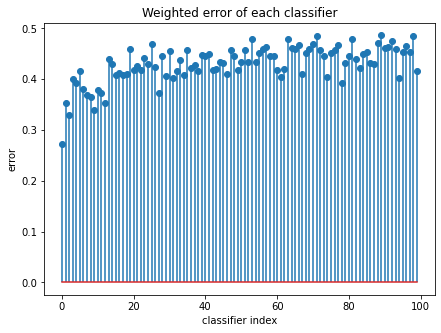

In [18]:
plt.figure(figsize=[7, 5])

plt.stem(adaboost_classifier.error_history)
plt.title('Weighted error of each classifier')
plt.xlabel('classifier index')
plt.ylabel('error')
plt.show()

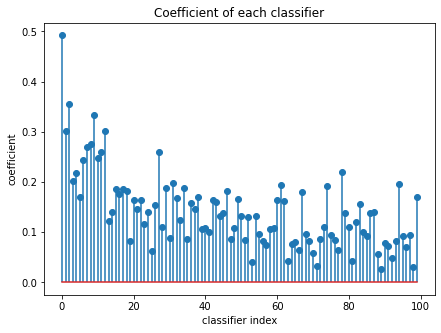

In [19]:
plt.figure(figsize=[7, 5])

plt.stem(coefficients)
plt.title('Coefficient of each classifier')
plt.xlabel('classifier index')
plt.ylabel('coefficient')
plt.show()

The first figure above shows the weighted error of each classifiers. Note that each classifiers act independently, which means that the errors are also independent to each other.

It is not strange that weighted error does not increase or decrease as index increases. It is because we adjust weights for training samples everytime so that all samples can be predicted correctly. Therefore, classifier with bigger classification index does not mean it's a better classifier.

The second figure above shows coefficient of each classifier. When we predict  final result of given data, each prediction from the classifier is multiplied with the classifier's coefficient. Therefore, predictions from classifiers with bigger coefficients get more influence on the final prediciton.

We can see that classifiers with bigger errors have smaller coefficients. This is because we want to consider predictions from classfiers with smaller errors more. Although we still want to consider predictions from unique classifiers that are adjusted to make better predictions on minority samples that aren't predicted well on other classifiers, we want some difference between classifiers. Therefore, coeffieints are assigned to have bigger values when classifiers have smaller errors.

---

### P1.4

In [20]:
classifiers = adaboost_classifier.classifiers    

acc_train, acc_test = compute_staged_accuracies(classifiers, X_train, y_train, X_test, y_test)

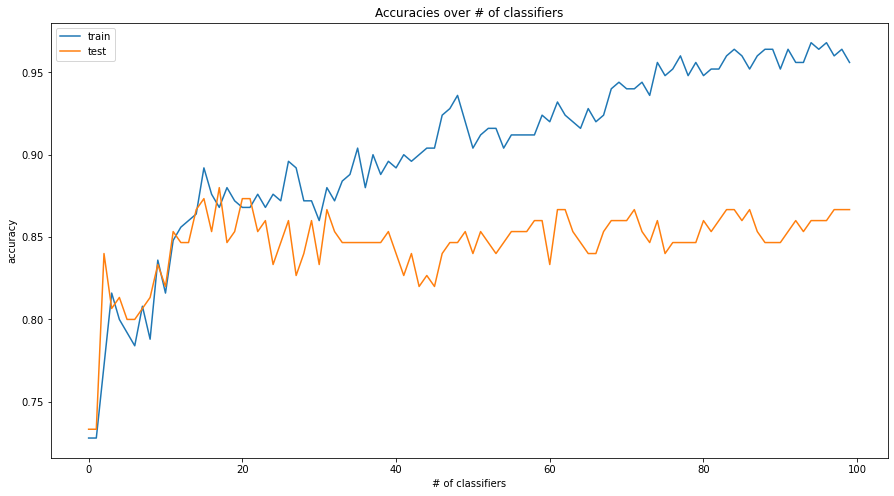

In [21]:
plt.figure(figsize=[15, 8])

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.title('Accuracies over # of classifiers')
plt.xlabel('# of classifiers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

We can see that training accuracy increases as number of classifiers used increases. Although it does not increase monotonically, we can find a clear increasing aspect. It means that using more classifiers increases complexity, which helps the overall model to fit better to training data.

The test accuracy also incerases as number of classifiers increases. This is also because the model can fit better to the training data which reflects the true data. The accuracy increased fast when used classifiers increased from 1 to 20. We can say that the increasing complexity actually helped the model to fit to the true data.

The test accuracy did not increase from some point, unlike train accuracy which reached almost 1.0. This is similar to what we saw in previous projects, which showed overfitting problems when the model because too complex. Being too complex made the model to fit too much to training data, which bothered the model from fitting to true data. However, unlike the previous projects, test accuracy did not decrease, but showed a constant accuracy near 0.85. This is the effect of using boosting techniques, especially AdaBoost in this project. Making multiple classifiers made an effect of increasing training samples. Therefore, the model was robust to overfitting problems. However, boosting can only 'reduce' overfitting problems - When number of classifiers increases very much, it eventually shows overfitting problems. Therefore, we must find the right number of classifiers to use.

---

### P2.1 

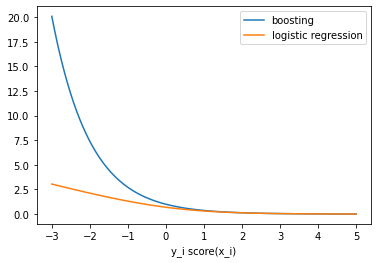

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3, 5, 100)
y1 = np.exp(-x)
y2 = np.log(1+np.exp(-x))

plt.plot(x, y1, label='boosting')
plt.plot(x, y2, label='logistic regression')


plt.xlabel('y_i score(x_i)')
plt.legend()

Logistic Regression and Boosting each uses the functions below as their objective functions.

> Logistic Regression : $\sum_{i=1}^{N}  ln(1+\text{exp}(-y_i\text{score}(\mathbf{x_i})))$  
> Boosting: $\sum_{i=1}^{N}  \text{exp}(-y_i\text{score}(\mathbf{x_i}))$  

When we train a model with training data, we are actually trying to minimize the objective function above. The figure above shows the difference of two functions. We can see that two functions are very similar in positive regions. However, boosting's objective functions was much larger in negative regions. It also increased much faster as $-y_i\text{score}(\mathbf{x_i})$ decreased. Since smaller $-y_i\text{score}(\mathbf{x_i})$ means the prediction was worse, boosting was penalizing much more on samples that were predicted poorly. This is what we intended to do when we adjusted the weights of each samples in AdaBoost.

Score function in above two functions are:

> Logistic Regression : $\text{score}(x) = \sum_{j} \hat{w}_j h_j(x)$,   j: feature  
> Boosting: $\text{score}(x) = \sum_{t} \hat{w}_t h_t(x)$,  t: classifier  

From the above graph, we can see that in order to minimize the objective function, we need to have larger absolute values from score functions. In order to achieve this, we must give bigger weights when corresponding $h_j(x)$ or $f_t(x)$ gives accurate predictions. (For example, if the answer($y_i$) is '1', we must give bigger weights to features(or classifiers) that give positive values, while giving smaller weights to feature(or classifiers) that give negative values) On the other hand, we must give smaller values (or even negative values) when corresponding $h_j(x)$ or $f_t(x)$ gives poor predictions. By doing this, we can make bigger $\mid\text{score}(x)\mid$, which makes $y_i\text{score}(\mathbf{x_i})$ increase, making a smaller loss function outputs.

---

### P2.2

**Decision Stump**

In [23]:
stump = DecisionStump()
stump.fit(X_train, y_train)
print(f"train: {np.average(stump.predict(X_train) == y_train)}, test: {np.average(stump.predict(X_test) == y_test)}")

train: 0.728, test: 0.7333333333333333


**Decision Tree**

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f"train: {np.average(tree.predict(X_train) == y_train)}, test: {np.average(tree.predict(X_test) == y_test)}")

train: 1.0, test: 0.8066666666666666


**Logisitc Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

regrssor = LogisticRegression()
regrssor.fit(X_train, y_train)
print(f"train: {np.average(regrssor.predict(X_train) == y_train)}, test: {np.average(regrssor.predict(X_test) == y_test)}")

train: 0.82, test: 0.84


**Adaboost**

In [26]:
print(f"train: {np.average(adaboost_classifier.predict(X_train) == y_train)}, test: {np.average(adaboost_classifier.predict(X_test) == y_test)}")

train: 0.956, test: 0.8666666666666667


First we can see that both train accuracy and test accuracy increased when we used decision tree instead of decision stump. This is because by making the tree more complex, the model was able to fit more to the given data. The single decision stump showed underfitting problem (train accuracy is so small that it's even smaller than test accuracy), therefore making better accuracy in decision tree.

However, the decision tree showed overfitting problem. When we compare the result of decision tree and Adaboost, we can see that test accuracy is lower in decision tree. However, decision tree shows 100% train accuracy. This means that the decision tree was too deep, leading to overfitting problem. This problem can be solved by setting early stop conditions like max_depth.

Another way to solve overfitting problem in decision tree was using Adaboost Technique. As mentioned above, Adaboost technique gives an effect of increasing the number of training samples (although it is not actually increased) by making multiple decision trees. As a result, the boosted decision tree does not get easily overfitted to complex model. We can see the effect of Adaboost at the high test accuracy compared to other models, especially decision tree and decision stump. Although the model was fitted very much to training data, it still showed high test accuracy.

When we compare the results from Logistic Regression and Adaboost, we can see that both train accuracy and test accuracy are bigger when Adaboost was used. The higher train accuracy tells us that Logistic Regression was not able to fit closely to training data. It is because we do not allow the model to fit too much to training data, since it gives poorer results for test data. When we train a model using Logistic Regression, we use various methods like penalizing bigger coefficients to avoid overfitting problems. In contrast, Adaboost showed very high train accuracy. It is because model trained by using Adaboost Technique is much stronger on overfitting problems, and it gives much more chace to fit tightly to true data by using more complex model. As a result, we can make a more complex model when we use Adaboost while still avoiding overfitting problem, which leads to both higher train and test accuracy.

---

### P2.3

**Do not use sklearn implementation of Adaboost.**

100% (20 of 20) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


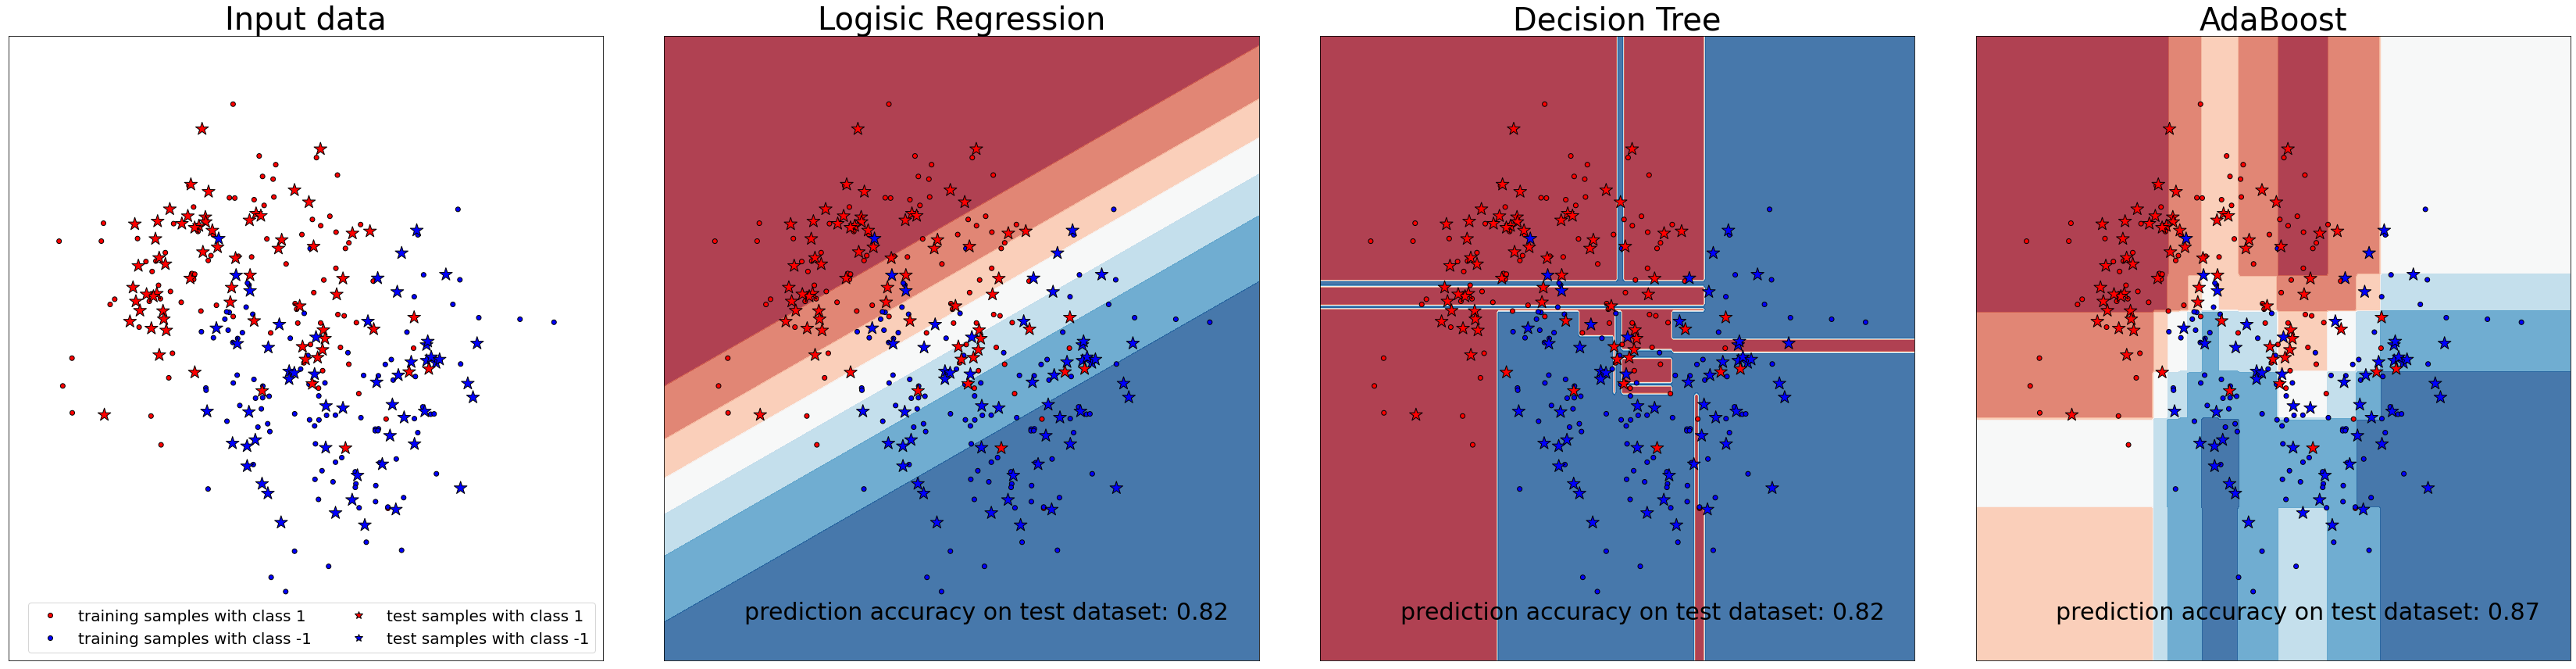

In [27]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

names = ["Logisic Regression", "Decision Tree", "AdaBoost"]


classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    AdaBoost(20) # your implementation.
]

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='training samples with class 1', mfc='#FF0000', mec='k'),
    Line2D([0], [0], marker='o', color='w', label='training samples with class -1', mfc='#0000FF', mec='k'),
    Line2D([0], [0], marker='*', color='w', label='test samples with class 1', mfc='#FF0000', mec='k', ms=10),
    Line2D([0], [0], marker='*', color='w', label='test samples with class -1', mfc='#0000FF', mec='k', ms=10)
]


figure = plt.figure(figsize=(48, 12))
i = 1

# prepare dataset.
X, y = make_moons(n_samples=300, noise=0.4, random_state=0)
y[y == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# generate meshgrid for decision boundaries.
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# plot.
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1, len(classifiers) + 1, 1)
ax.set_title("Input data", size=40)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', label='train samples')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*', label='test samples')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.legend(handles=legend_elements, ncol=2, loc='lower right', fontsize=20)
ax.set_xticks(())
ax.set_yticks(())

# iterate over classifiers
i += 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = np.average(clf.predict(X_test) == y_test)
    
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax.set_title(name, size=40)
    ax.text(xx.max() - .3, yy.min() + .3, ('prediction accuracy on test dataset: %.2f' % score).lstrip('0'), size=30, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

The above figures plot the predictions and its confidences from 3 classification methods.

First we can see that Decision Tree and Logistic Regression both shows 0.82 test accuracy. However, Decision Tree and Logistic Regression shows different results in 'confidence' of their predictions. The prediciton from logistic regression shows lighter colored areas and even white areas. The predictions in lighter colored areas tell us that the model has lower confidence in it. The white area tells us that the model is not sure which prediction it should make. In contrast, Decision Tree's prediction does not show any of these areas. It means that the model is confident on all of its predictions. However, since the test accuracy is 0.82, there are clearly some predictions that aren't correct. In other words, decision tree's model was too confident on some predictions that it should have been.

We can also see some very slim areas in Decision Tree's prediction. Those areas include very small number of predictions, which show signs of overfitting. It's because those narrow areas are made specially for very limited number of samples, which may be noise inside the training data. Combining fitting to these noise and over-confidence problem makes a big disadvantage for a simple decision tree.

Compared to Decision Tree, we can find ligher colored areas and white areas in decision boundaries from boosted decision tree. It tells us that Adaboost can resolve over-confidence problem in Decision Tree. We can also see that the zones are larger in boosted decision tree than plain decision tree. This tells us that Adaboost technique can distinguish confident predictions and uncertain predictions. This helps us make better conclusions from the data. Larger zones tell us that adaboost technique also helped in resolving over-fitting problem.

When we compare the decision boundaries of Logistic Regreesion and boosted decision tree, we can see that there are much more zones divided in boosted decision tree. And the test accuracy was bigger in boosted decision tree (0.87) than Logistic Regression (0.82). These tells us that Logistic Regression was not able to fit tightly to true data. However, by using more complex models, boosted decision tree was able to divide the domain into more smaller zones, fitting to data from smaller number of samples. 

The above two advantages of boosting compared to decision tree and Logistic Regression actually helped increasing test accuracy. The test accuracy increased to 0.87 from 0.82.